# Visualizing Time Series Data

## Introduction

As mentioned in an earlier lesson, time series visualizations play an important role in the analysis of time series data. Time series are often plotted to allow data diagnostics to identify temporal structures. 

In this lab, we'll cover main techniques for visualizing time series data in Python using the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia. The units are in degrees Celsius and there are 3,650 observations. The [source](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990) of the data is credited to the Australian Bureau of Meteorology.

## Objectives

You will be able to:

- Explore the temporal structure of time series with line plots 
- Construct and interpret time series histogram and density plots 
- Create a time series heat map

## Let's get started! 

Run the cell below to import the necessary classes and libraries: 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score

- Import the dataset which is available in `'min_temp.csv'` 
- Print the first five rows of the data 

In [2]:
data = pd.read_excel("D:\\kulea_projects\\r_project\\global_sugar\\Wholesale Sugar Prices.xlsx",)

In [3]:
# # Load the df from 'min_temp.csv'
# temp_data = pd.read_csv('min_temp.csv')

# # Print the first five rows
# temp_data.head()
data.head()

,date,kampala,mombasa,nairobi,dar_es_salaam,kigali,durban,cape_town,johannesburg,mogadishu w,djibouti b,berbera w,juba w,juba b,djibouti w,mogadishu b
0,2019-08-22,NaN,786.0,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-26,NaN,786.0,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-29,NaN,786.0,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-02,NaN,776.0,786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-05,NaN,766.0,790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = data[['date', 'kampala']]

In [9]:
df.dropna(inplace=True)

In [10]:
df.head(50)

,date,kampala
44,2020-01-24,723.0
45,2020-01-28,723.0
46,2020-01-31,723.0
47,2020-02-04,723.0
48,2020-02-07,723.0
49,2020-02-11,723.0
50,2020-02-14,723.0
51,2020-02-18,723.0
52,2020-02-21,723.0
53,2020-02-25,723.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 44 to 477
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     424 non-null    datetime64[ns]
 1   kampala  424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.9 KB


In [12]:
df.tail()

,date,kampala
473,2024-01-26,1000.0
474,2024-01-30,1000.0
475,2024-02-02,964.0
476,2024-02-06,964.0
477,2024-02-09,964.0


In [17]:
# # Assuming 'Date' column is in datetime format
# df['date'] = pd.to_datetime(df['date'])

# Filter dates up to December 2023
data = df[df['date'] <= '2024-12-31']

data.tail()

,date,kampala
473,2024-01-26,1000.0
474,2024-01-30,1000.0
475,2024-02-02,964.0
476,2024-02-06,964.0
477,2024-02-09,964.0


In [7]:
# # Assuming 'Date' column is in datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Filter dates up to December 2023
# data = df[df['Date'] <= '2023-12-31']

# data.tail()

,Date,Close
6026,2023-12-22,20.57
6027,2023-12-26,20.46
6028,2023-12-27,20.63
6029,2023-12-28,21.87
6030,2023-12-29,20.49


- Make sure the `'Date'` column is treated as an actual date by Python (notice how the date is formatted before attempting to changing the data type) 
- Set the index of `temp_data` to this `'Date'` column 

In [18]:
# Change the data type of the 'Date' column
# Convert Date to a datetime column
# data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

# Set the index to the 'Date' column
# Make Date the index 
data.set_index('date', inplace=True)

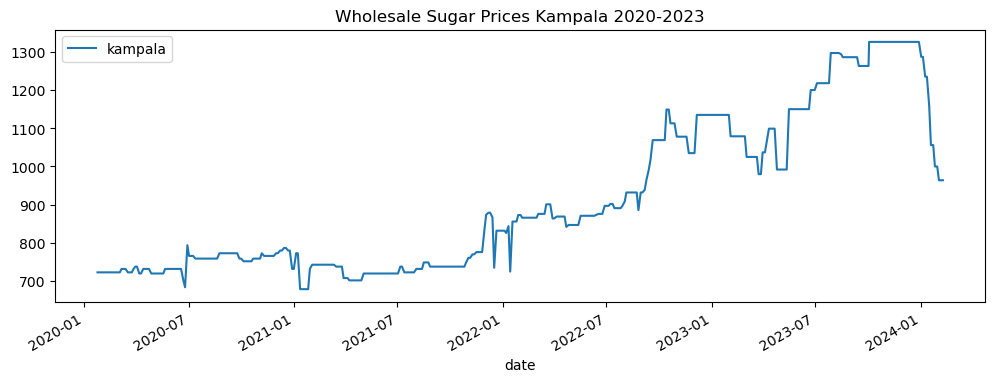

In [19]:

data.plot(figsize=(12,4))
plt.title('Wholesale Sugar Prices Kampala 2020-2023');

Print the index of `data`. 

In [19]:
# Print the index of the data
data


,nairobi
date,
2019-08-22,805.0
2019-08-26,805.0
2019-08-29,805.0
2019-09-02,786.0
2019-09-05,790.0
...,...
2023-12-15,1019.0
2023-12-19,962.0
2023-12-22,962.0


## Time Series line plot

Create a time series line plot for `temp_data`

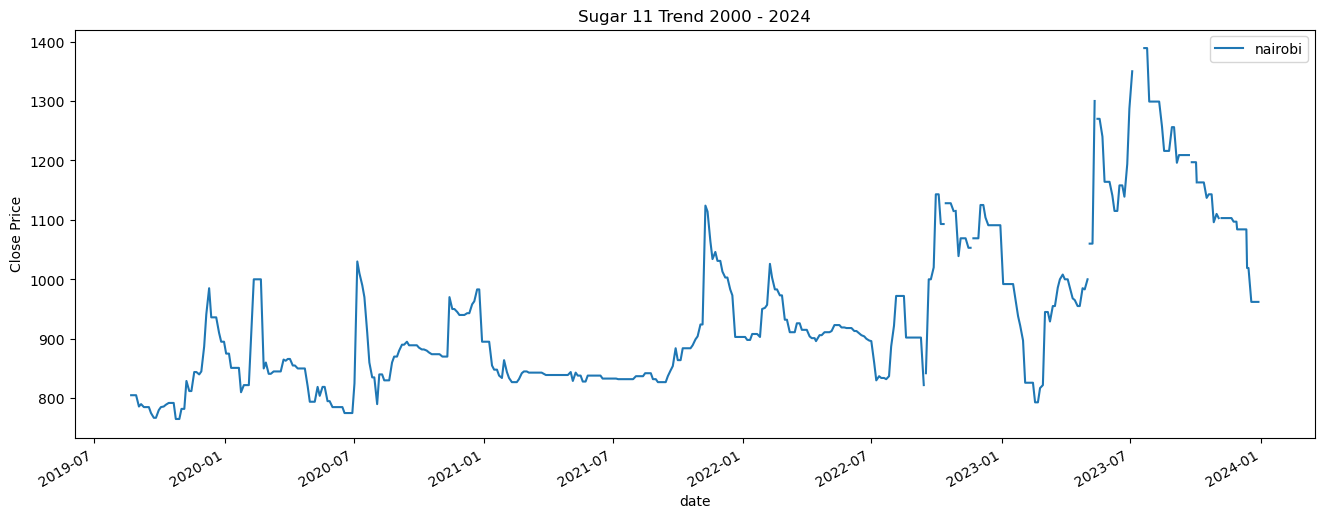

In [24]:
data.plot(figsize = (16, 6))
plt.title('Sugar 11 Trend 2000 - 2024')
plt.ylabel('Close Price');

Some distinguishable patterns appear when we plot the data. Here we can see a pattern in our time series, i.e., temperature values are maximum at the beginning of each year and minimum at around the 6th month. Yes, we are talking about Australia here so this is normal. This cyclical pattern is known as seasonality and will be covered in later labs. 

## Time Series dot plot

For a dense time series, as seen above, you may want to change the style of a line plot for a more refined visualization with a higher resolution of events. One way could be to change the continuous line to dots, each representing one entry in the time series. 

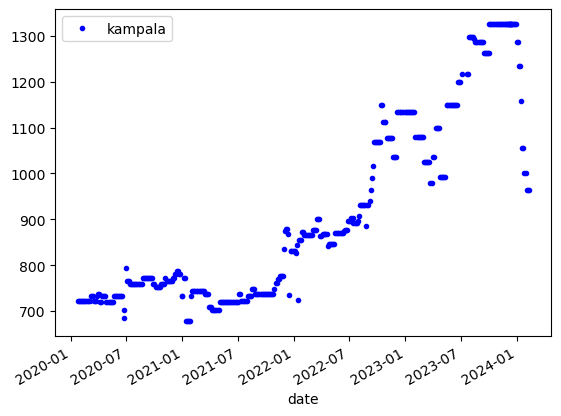

In [20]:
# Use dots instead on a continuous line and redraw the time series 
data.plot(style = '.b');

This plot helps us identify clear outliers in certain years!

## Grouping and Visualizing time series data

Now, let's group the data by year and create a line plot for each *year* for direct comparison. You can regroup data per year using Pandas' `grouper()` function in conjunction with the `.groupby()` method.  

In [21]:
# Use pandas grouper to group values using annual frequency
year_groups = data.groupby(pd.Grouper(freq = 'A'))

In [15]:
# # Use pandas grouper to group values using annual frequency
# year_groups = data.groupby(pd.Grouper(freq = 'A'))

Rearrange the data so you can create subplots for each year. 

In [22]:
len(year_groups)

5

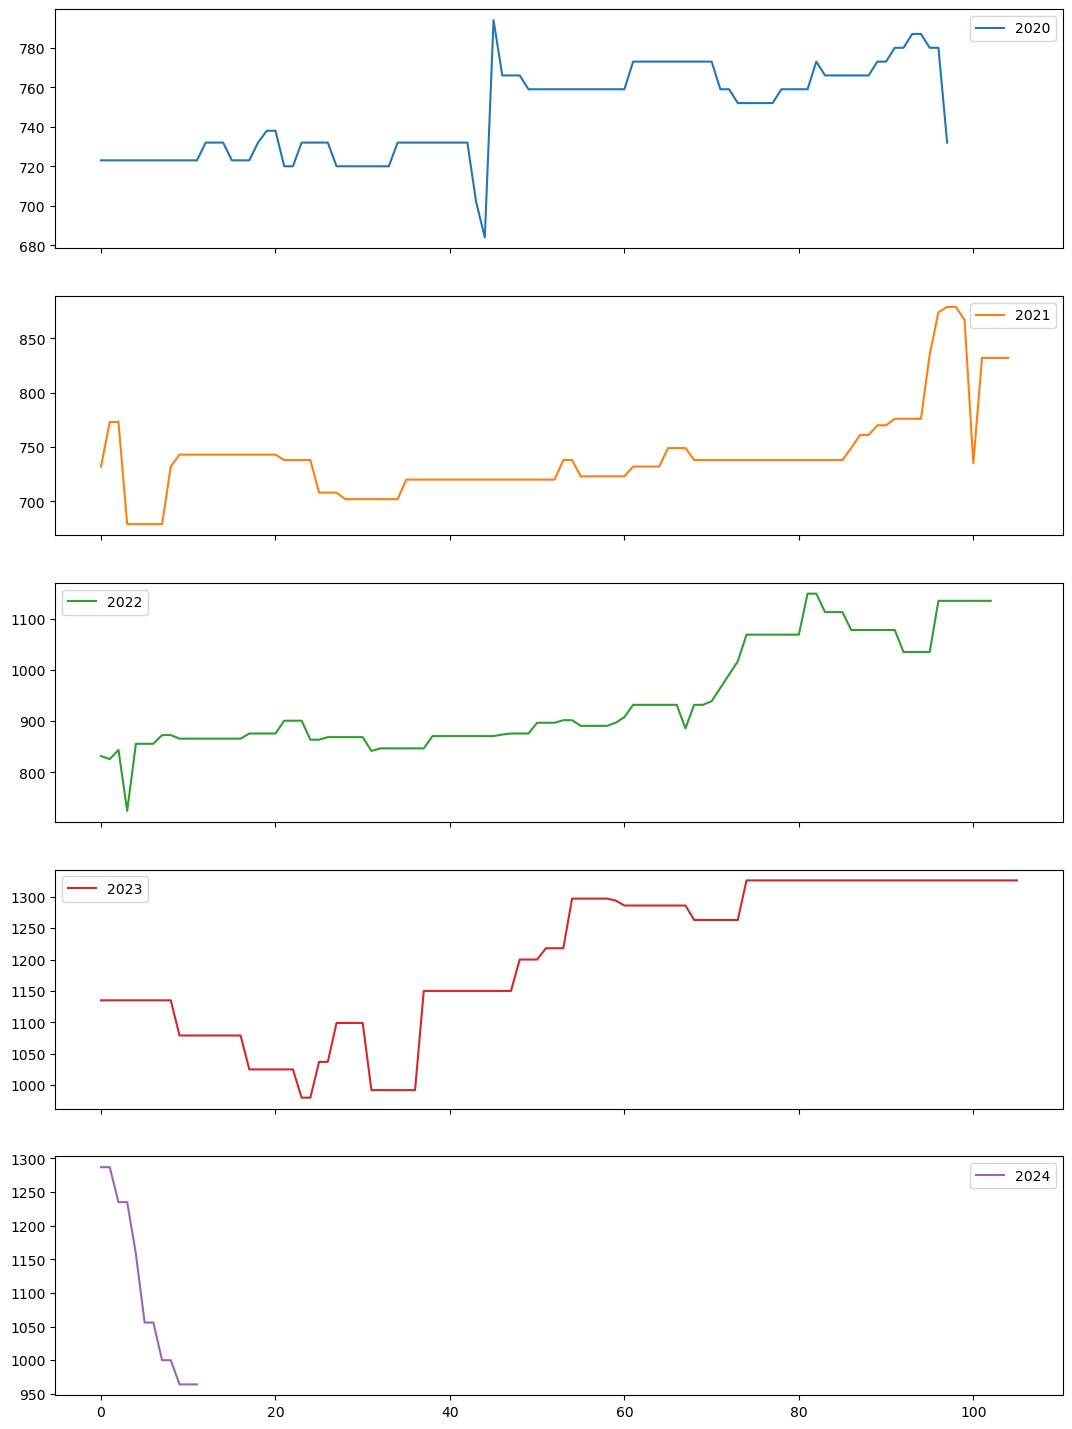

In [23]:
# Create a new DataFrame to store yearly values in columns
temp_annual = pd.DataFrame()

# Determine the length of the longest group
max_length = max(len(group) for _, group in year_groups)

# Pad shorter groups with NaN values to match the length of the longest group
for yr, group in year_groups:
    padded_values = group.values.ravel()
    padded_values = np.pad(padded_values, (0, max_length - len(padded_values)), 'constant', constant_values=np.nan)
    temp_annual[yr.year] = padded_values

# Plot the yearly groups as subplots
temp_annual.plot(figsize=(13, 18), subplots=True, legend=True);


You can see 10 subplots corresponding to the number of columns in your new DataFrame. Each plot is 365 days in length following the annual frequency.

Now, plot all the years on the same graph instead of different subplots. 

In [30]:
# # Create a new DataFrame to store yearly values in columns
# temp_annual_ = pd.DataFrame()

# # Determine the length of the longest group
# max_length = max(len(group) for _, group in year_groups_)

# # Pad shorter groups with NaN values to match the length of the longest group
# for yr, group in year_groups_:
#     padded_values = group.values.ravel()
#     padded_values = np.pad(padded_values, (0, max_length - len(padded_values)), 'constant', constant_values=np.nan)
#     temp_annual_[yr.year] = padded_values

# # Plot the yearly groups as subplots
# temp_annual_.plot(figsize=(13, 18), subplots=True, legend=True);


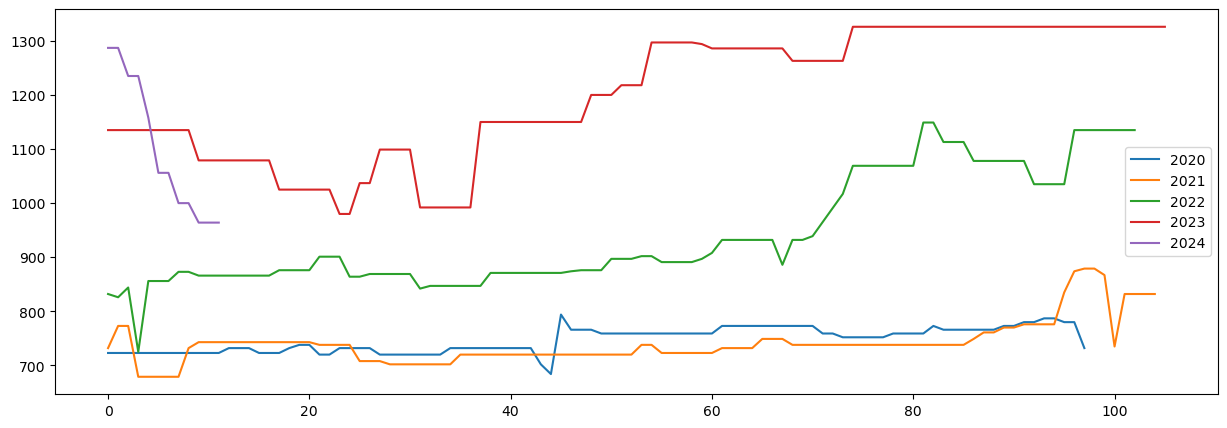

In [24]:
# Plot all years on the same graph
# Plot overlapping yearly groups 
temp_annual.plot(figsize = (15,5), subplots=False, legend=True);

We can see in both plots above that due to the dense nature of time-series (365 values) and a high correlation between the values in different years (i.e. similar temperature values for each year), we can not clearly identify any differences in these groups. However, if you try this on the CO2 dataset used in the last lab, you should be able to see a clear trend showing an increase every year. 

## Time Series Histogram

Create a histogram for your data.

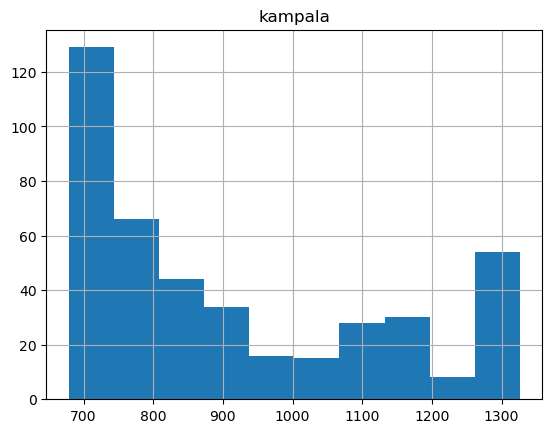

In [25]:
# Plot a histogram of the temperature dataset
data.hist();

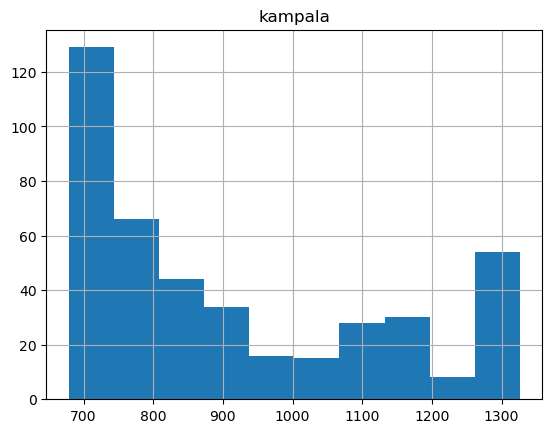

In [26]:
# Plot a histogram of the temperature dataset
data.hist();

The plot shows a distribution that looks strongly Gaussian/Normal. 


## Time Series Density Plots

Create a time series density plot

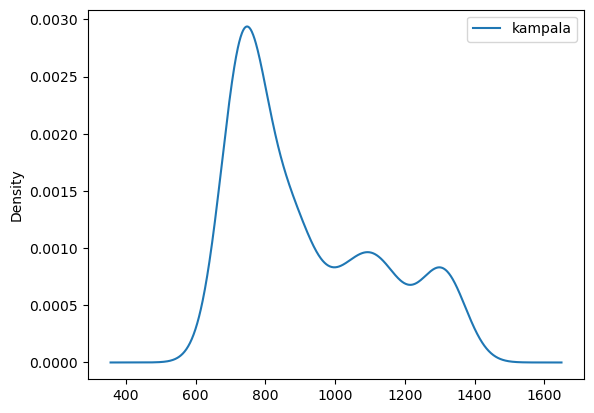

In [27]:
# Plot a density plot for temperature dataset
data.plot(kind='kde');

The density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

## Time Series Box and Whisker Plots by Interval

Let's use our groups by years to plot a box and whisker plot for each year for direct comparison using the `.boxplot()` method. 

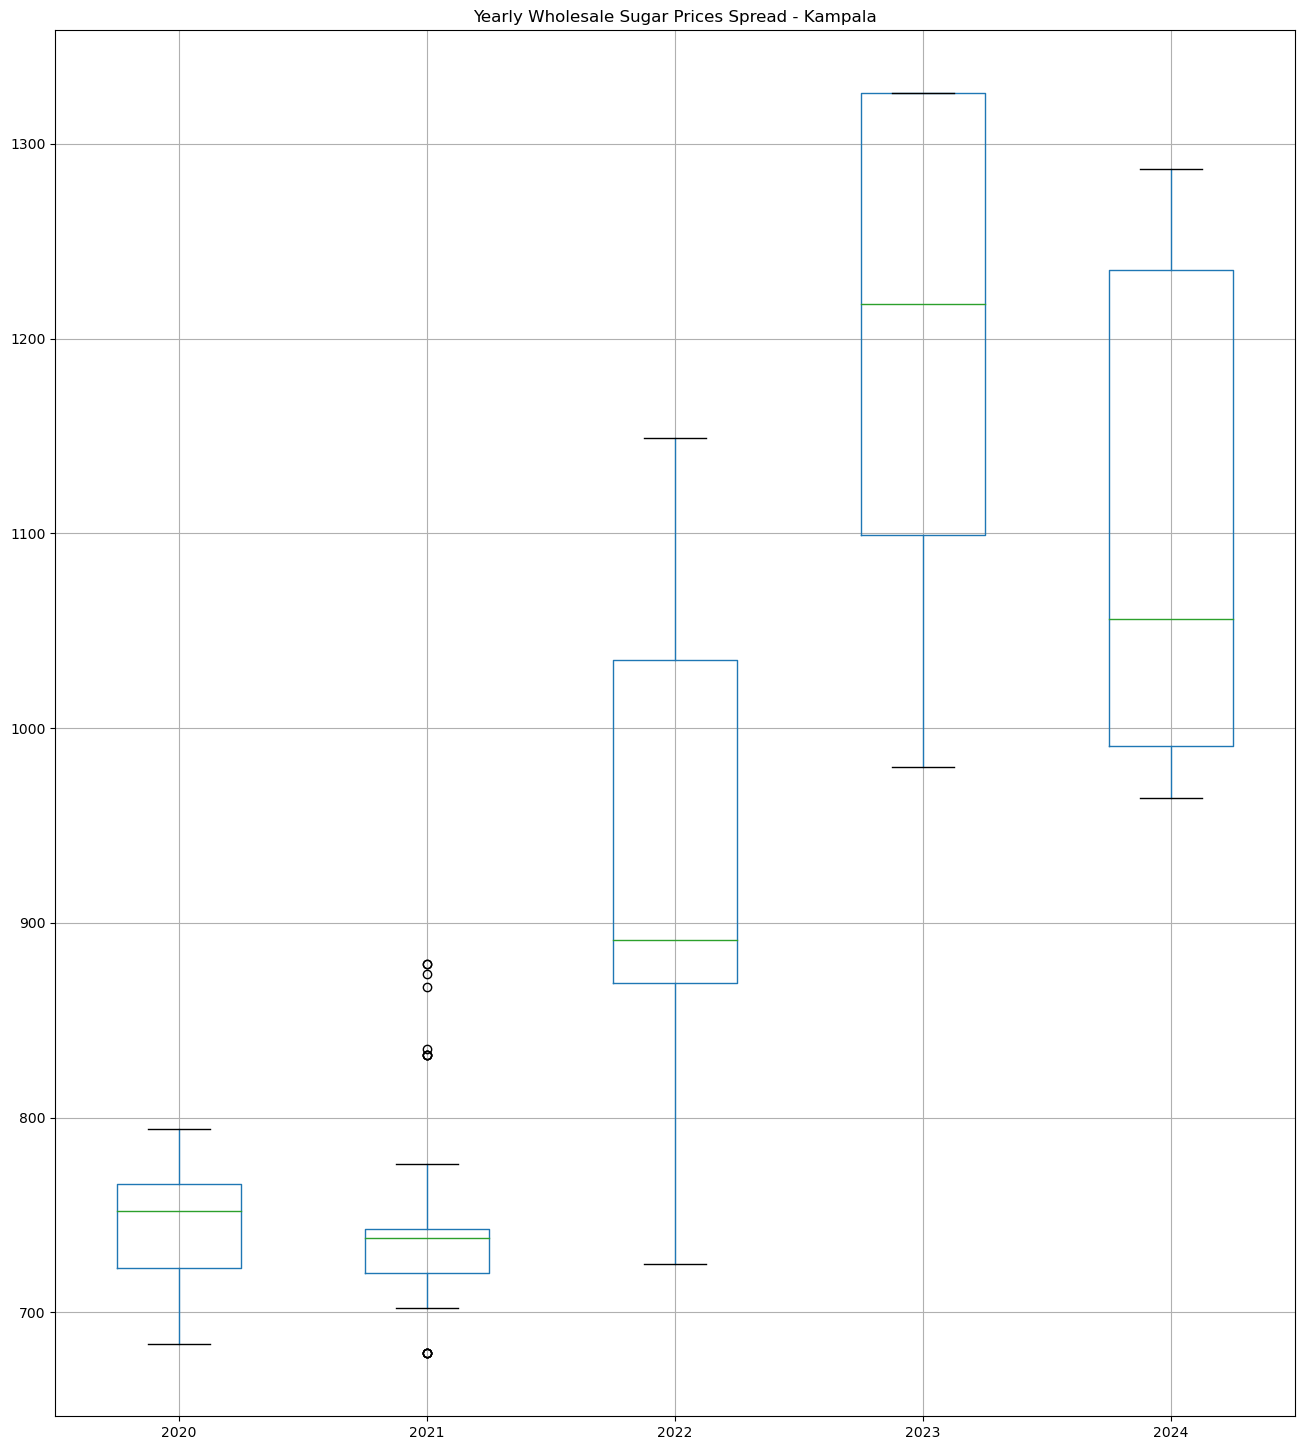

In [28]:
# Generate a box and whiskers plot for temp_annual
plt.figure(figsize=(16,18))
temp_annual.boxplot()
plt.title('Yearly Wholesale Sugar Prices Spread - Kampala');

In our plot above, we don't see much difference in the mean temperature over years, however, we can spot some outliers showing extremely cold or hot days. 

We can also plot distribution across months within each year. Perform the following tasks to achieve this: 

- Extract observations for the year 1990 only, the last year in the dataset 
- Group observations by month, and add each month to a new DataFrame as a column 
- Create 12 box and whisker plots, one for each month of 1990 

In [41]:
# # Generate a box and whiskers plot for temp_annual
# plt.figure(figsize=(16,18))
# temp_annual_.boxplot();

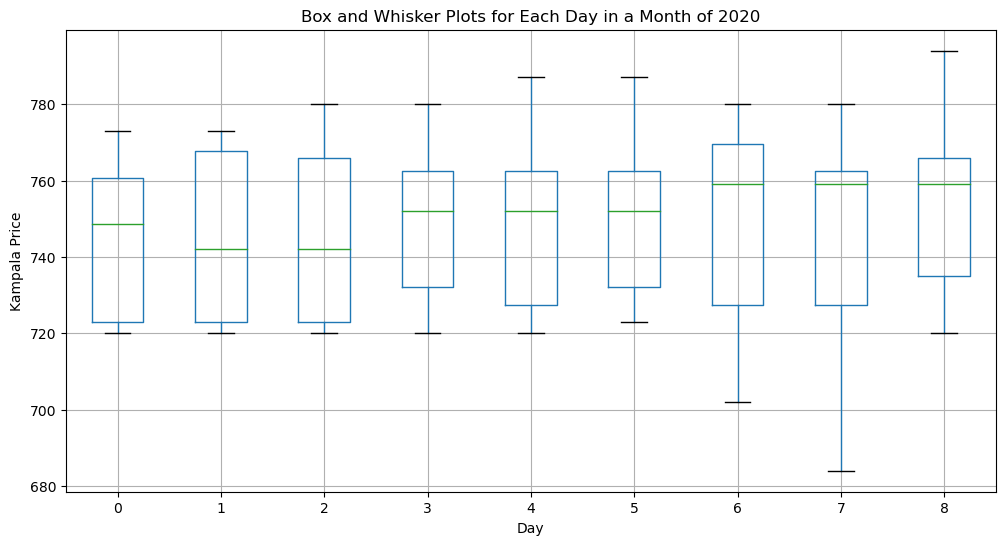

In [29]:
# Use temp_data to extract values for 2020
yr_2020 = data['2020']
yr_2020

# Group observations by month
# df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month)
groups_monthly = yr_2020.groupby(pd.Grouper(freq = 'M'))
groups_monthly.head()


# # Add each month to DataFrame as a column# Create a new DataFrame with each month as a column
# months_1990 = None
# months_df = None
monthly_data = groups_monthly['kampala'].apply(list).apply(pd.Series)

# # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = None
# Extract month names
month_names = monthly_data.index.strftime('%b')


# Plot box and whisker plots for each month
plt.figure(figsize=(12, 6))
monthly_data.boxplot()
plt.title('Box and Whisker Plots for Each Day in a Month of 2020')
plt.xlabel('Day')
plt.ylabel('Kampala Price')
plt.show()

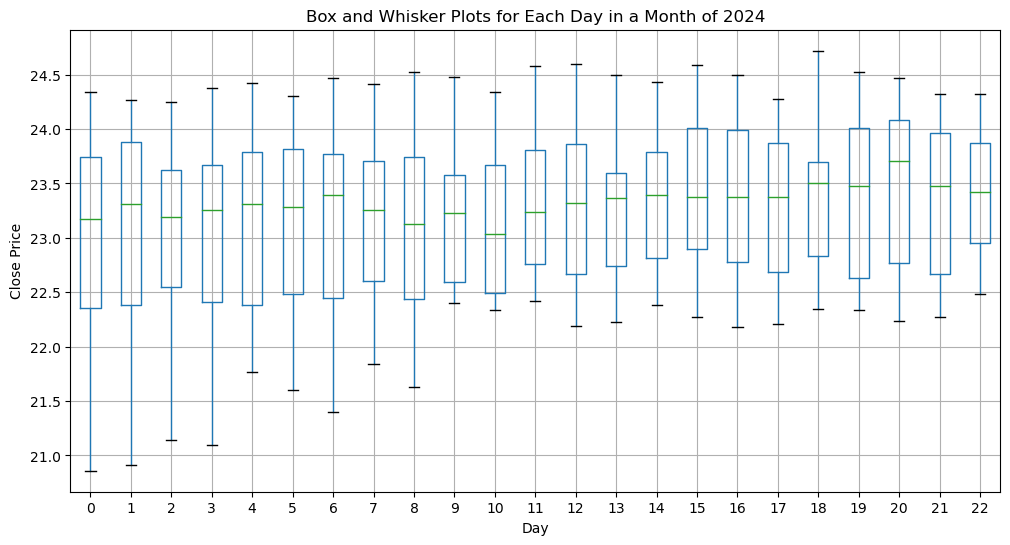

In [79]:
# # Use temp_data to extract values for 2024
# yr_2024 = data_['2024']
# yr_2024

# # Group observations by month
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month)
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # # Add each month to DataFrame as a column# Create a new DataFrame with each month as a column
# # months_1990 = None
# # months_df = None
# monthly_data = groups_monthly['Close'].apply(list).apply(pd.Series)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# # months_df.columns = None
# # Extract month names
# month_names = monthly_data.index.strftime('%b')


# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# monthly_data.boxplot()
# plt.title('Box and Whisker Plots for Each Day in a Month of 2024')
# plt.xlabel('Day')
# plt.ylabel('Close Price')
# plt.show()

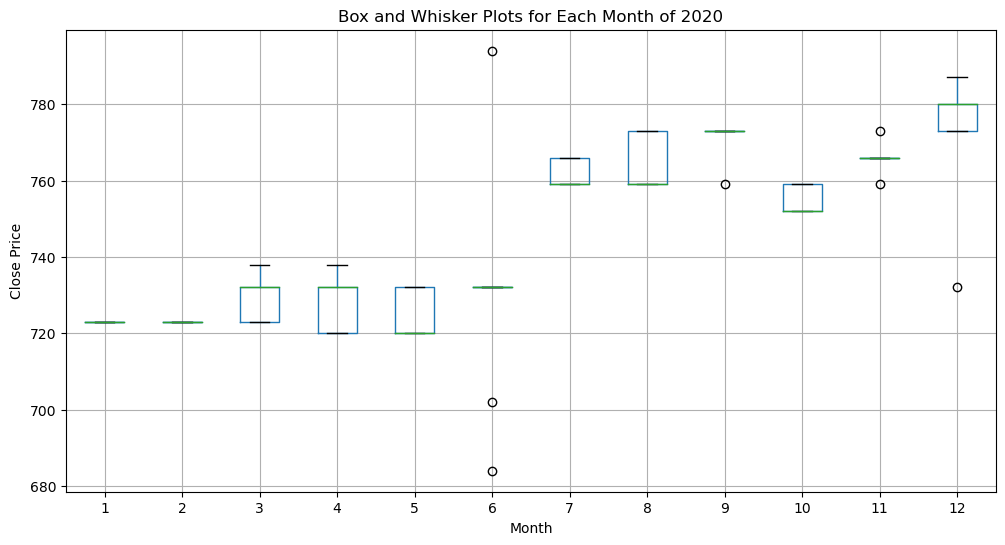

In [31]:
# Use temp_data to extract values for 1990
yr_2020 = data['2020']
yr_2020

# Group observations by month using Grouper function
# df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
groups_monthly = yr_2020.groupby(pd.Grouper(freq = 'M'))
groups_monthly.head()


# Add each month to DataFrame as a column
months_1990 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# Create a new DataFrame with each month as a column
months_df = pd.DataFrame(months_1990)

# # Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = months_df.columns = range(1, 13)

# Plot box and whisker plots for each month
plt.figure(figsize=(12, 6))
months_df.boxplot()
plt.title('Box and Whisker Plots for Each Month of 2020')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

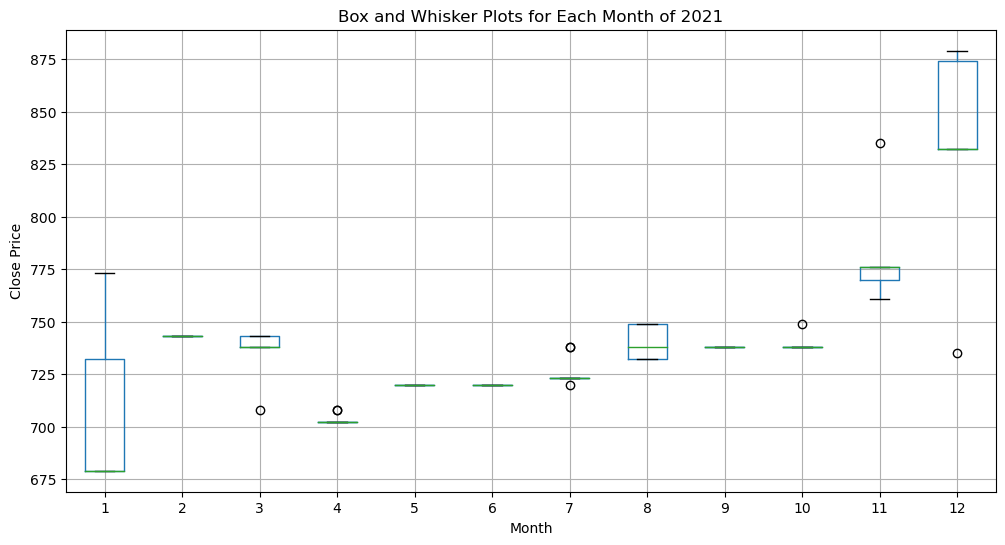

In [32]:
# Use temp_data to extract values for 2021
yr_2021 = data['2021']
yr_2021

# Group observations by month using Grouper function
# df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
groups_monthly = yr_2021.groupby(pd.Grouper(freq = 'M'))
groups_monthly.head()


# Add each month to DataFrame as a column
months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# Create a new DataFrame with each month as a column
months_df = pd.DataFrame(months_2024)

# # Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = months_df.columns = range(1, 13)

# Plot box and whisker plots for each month
plt.figure(figsize=(12, 6))
months_df.boxplot()
plt.title('Box and Whisker Plots for Each Month of 2021')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

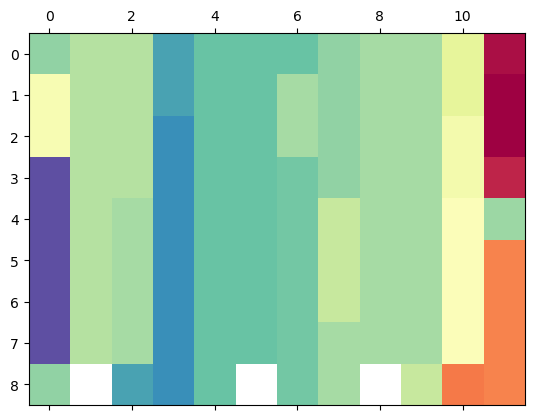

In [33]:
# Draw a heatmap comparing the months of the year in 2021 
# The months group DataFrame
year_matrix = months_df

# Draw a heatmap with matshow()
# plt.figure(figsize = (16, 26))
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

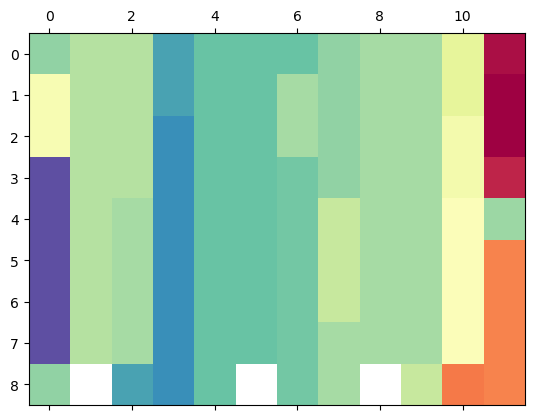

In [34]:
# Draw a heatmap comparing the months of the year in 2021 
# The months group DataFrame
year_matrix_ = months_df

# Draw a heatmap with matshow()
# plt.figure(figsize = (16, 26))
plt.matshow(year_matrix_, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

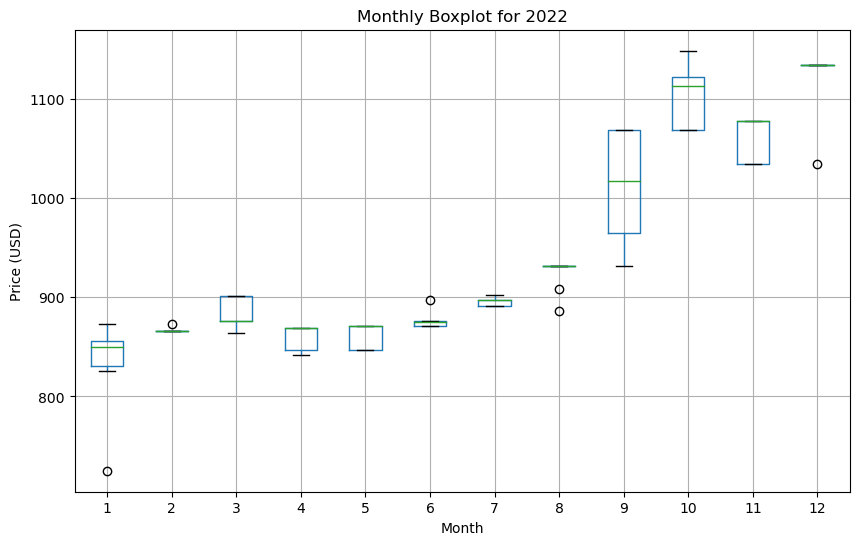

In [35]:
# Step 1: Extract observations for the year 2022
yr_2022 = data['2022']

# Step 2: Group observations by month using Grouper function
groups_monthly = yr_2022.groupby(pd.Grouper(freq='M'))

# Step 3: Add each month to DataFrame as a column
months_2022 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# Step 4: Create a new DataFrame with each month as a column
months_df = pd.DataFrame(months_2022)

# Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = range(1, 13)

# Plot box and whisker plots for each month
months_df.boxplot(figsize=(10, 6))
plt.title('Monthly Boxplot for 2022')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.show()


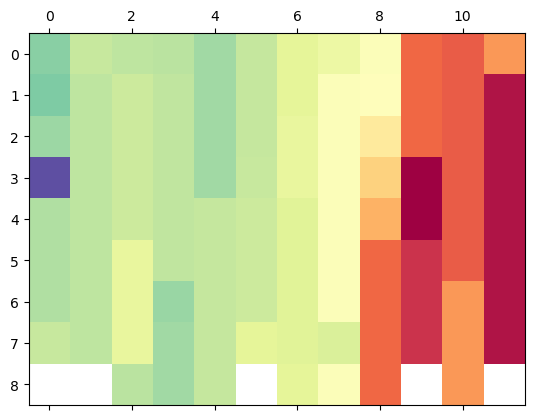

In [36]:
# Draw a heatmap comparing the months of the year in 2020
# The months group DataFrame
year_matrix = months_df

# Draw a heatmap with matshow()
# plt.figure(figsize = (16, 26))
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

In [55]:
data.head()

,kampala
date,
2020-01-24,723.0
2020-01-28,723.0
2020-01-31,723.0
2020-02-04,723.0
2020-02-07,723.0


In [64]:
data

,kampala,year
date,,
2020-01-24,723.0,NaN
2020-01-28,723.0,NaN
2020-01-31,723.0,NaN
2020-02-04,723.0,NaN
2020-02-07,723.0,NaN
...,...,...
2024-01-26,1000.0,NaN
2024-01-30,1000.0,NaN
2024-02-02,964.0,NaN


In [65]:
# Step 1: Extract observations for the year 2023
yr_2023 = data['2023']

# Step 2: Group observations by month using Grouper function
groups_monthly = yr_2023.groupby(pd.Grouper(freq='M'))

# Step 3: Add each month to DataFrame as a column
months_2019 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# Step 4: Create a new DataFrame with each month as a column
months_df = pd.DataFrame(months_2019)

# Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = range(1, 6)

# Plot box and whisker plots for each month
months_df.boxplot(figsize=(10, 6))
plt.title('Monthly Boxplot for 2023')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.show()


ValueError: Length mismatch: Expected axis has 24 elements, new values have 5 elements

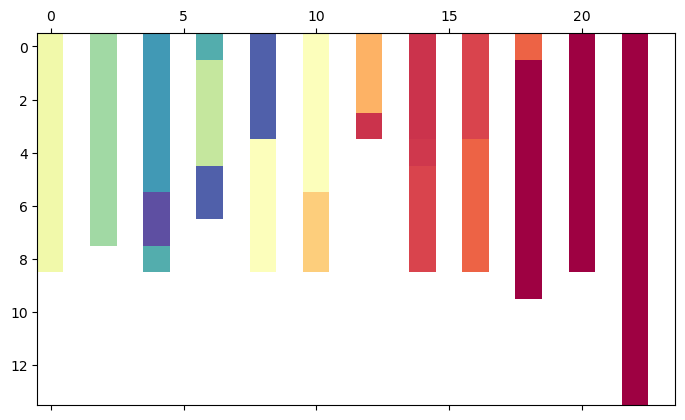

In [67]:
# Draw a heatmap comparing the months of the year in 2018 
# The months group DataFrame
year_matrix = months_df

# Draw a heatmap with matshow()
# plt.figure(figsize = (16, 26))
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

In [68]:
len(months_df.columns)

24

We see 12 box and whisker plots, showing the significant change in the distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

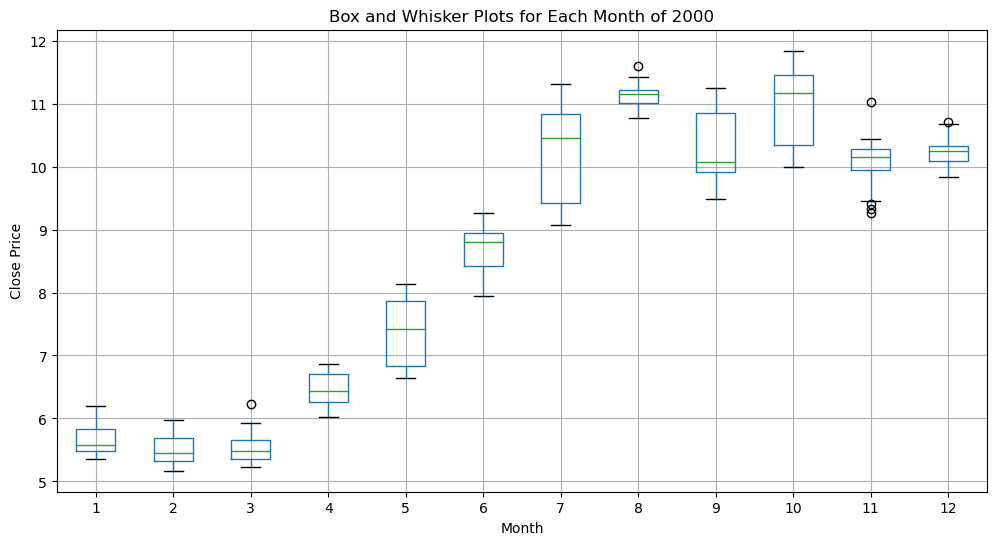

In [37]:
# # Use temp_data to extract values for 2000
# yr_2024 = data_['2000']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2000')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

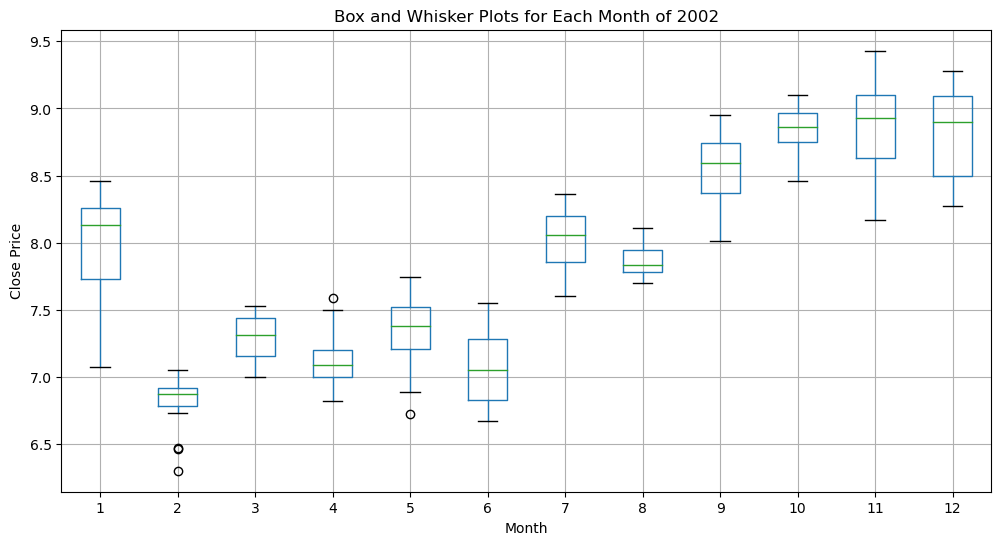

In [38]:
# # Use temp_data to extract values for 2002
# yr_2024 = data_['2002']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2002')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

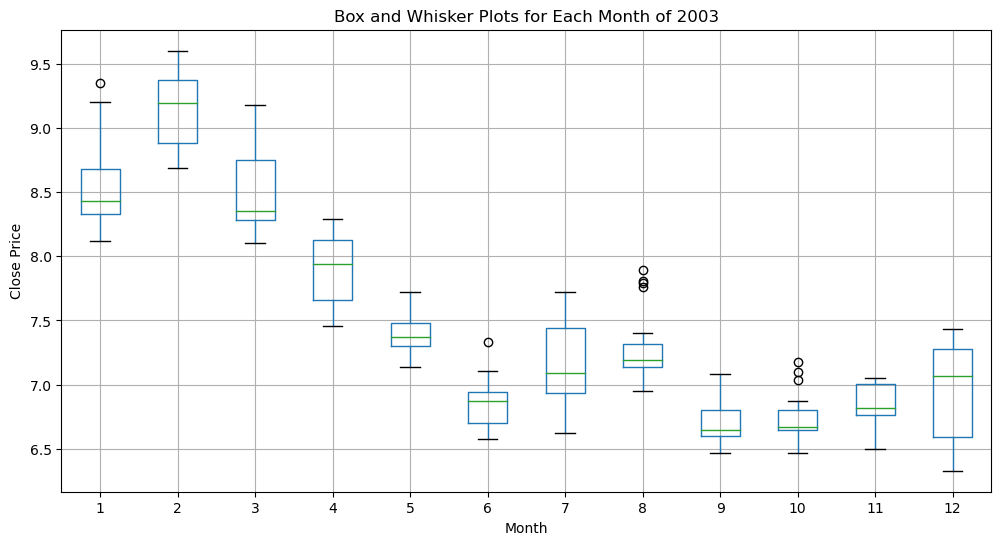

In [39]:
# # Use temp_data to extract values for 2003
# yr_2024 = data_['2003']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2003')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

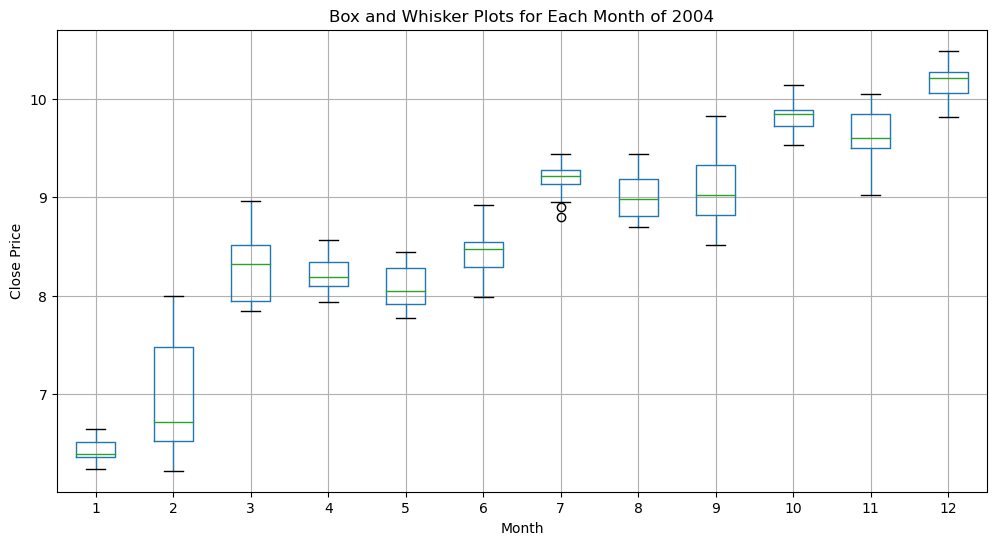

In [40]:
# # Use temp_data to extract values for 2004
# yr_2024 = data_['2004']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2004')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

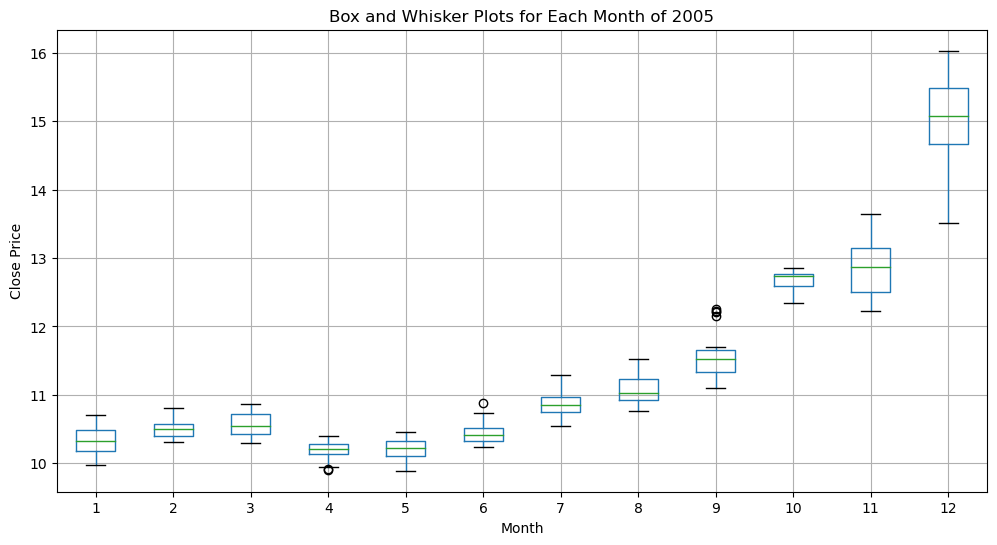

In [41]:
# # Use temp_data to extract values for 2005
# yr_2024 = data_['2005']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2005')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

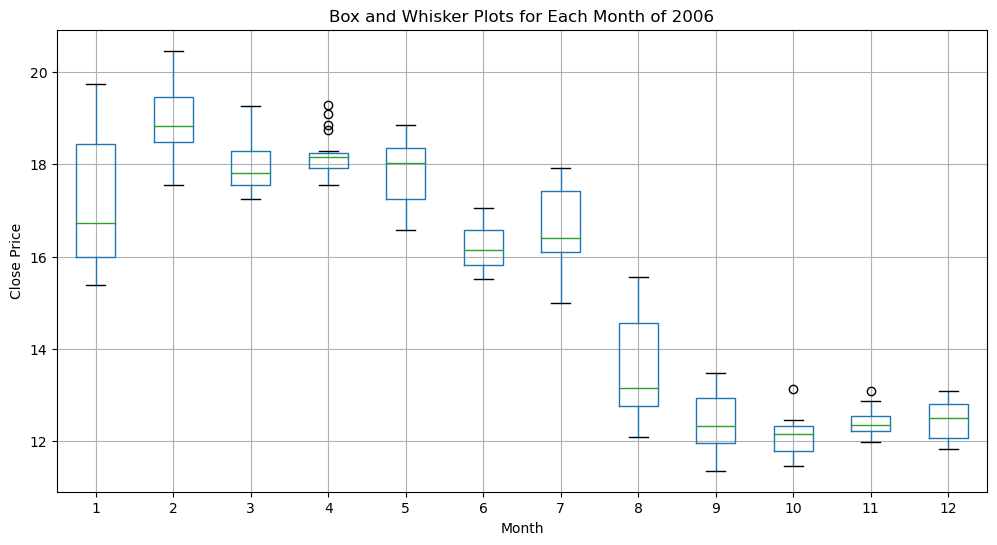

In [42]:
# # Use temp_data to extract values for 2006
# yr_2024 = data_['2006']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2006')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

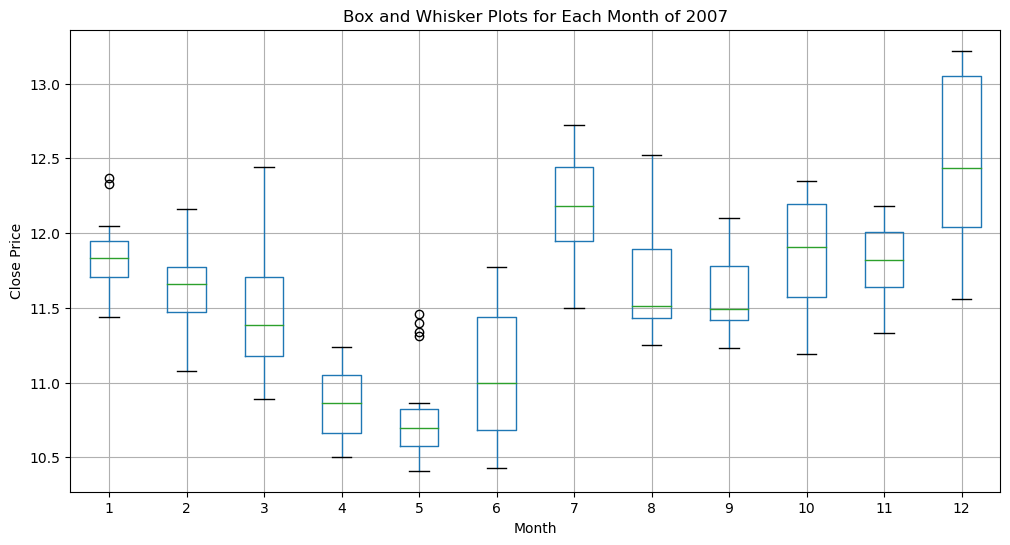

In [43]:
# # Use temp_data to extract values for 2007
# yr_2024 = data_['2007']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2007')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

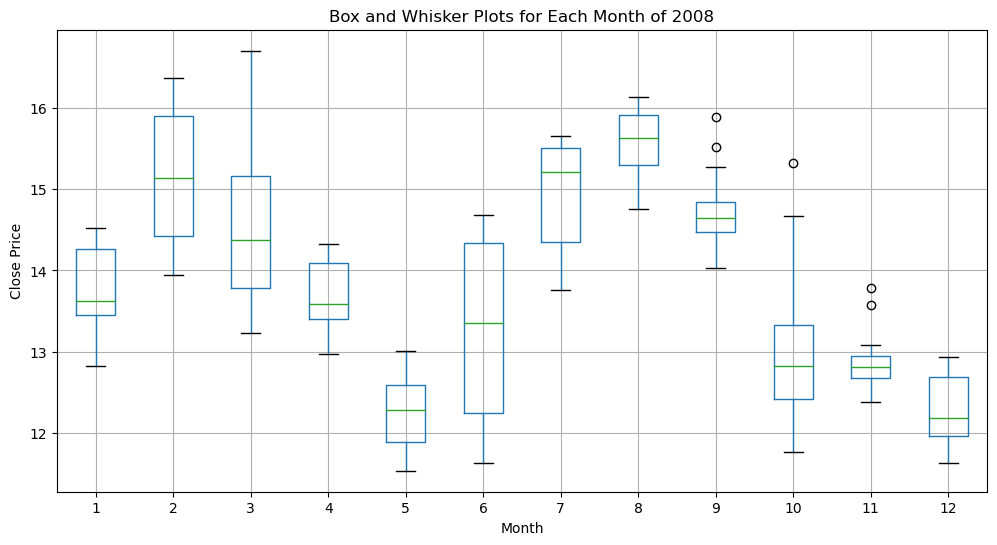

In [44]:
# # Use temp_data to extract values for 2008
# yr_2024 = data_['2008']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2008')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

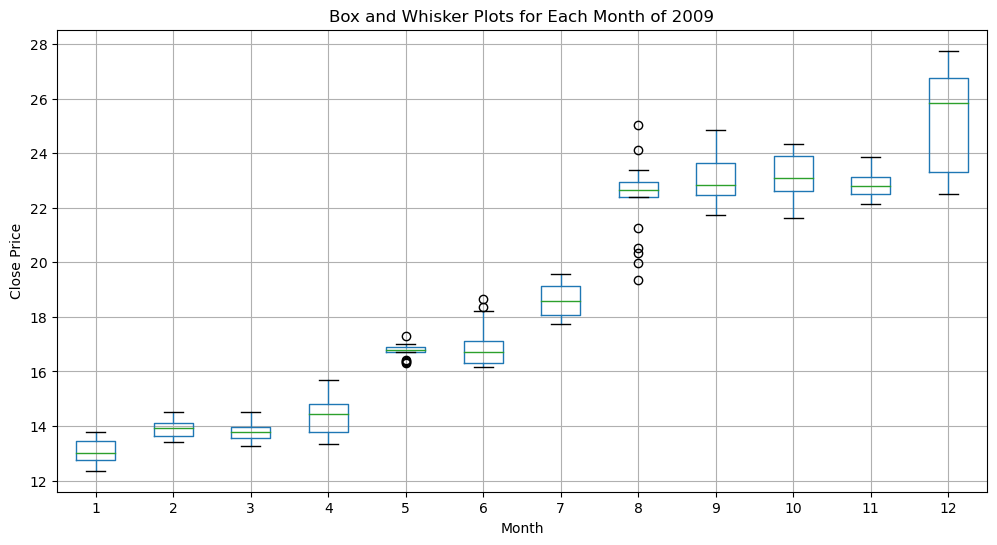

In [45]:
# # Use temp_data to extract values for 2009
# yr_2024 = data_['2009']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2009')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

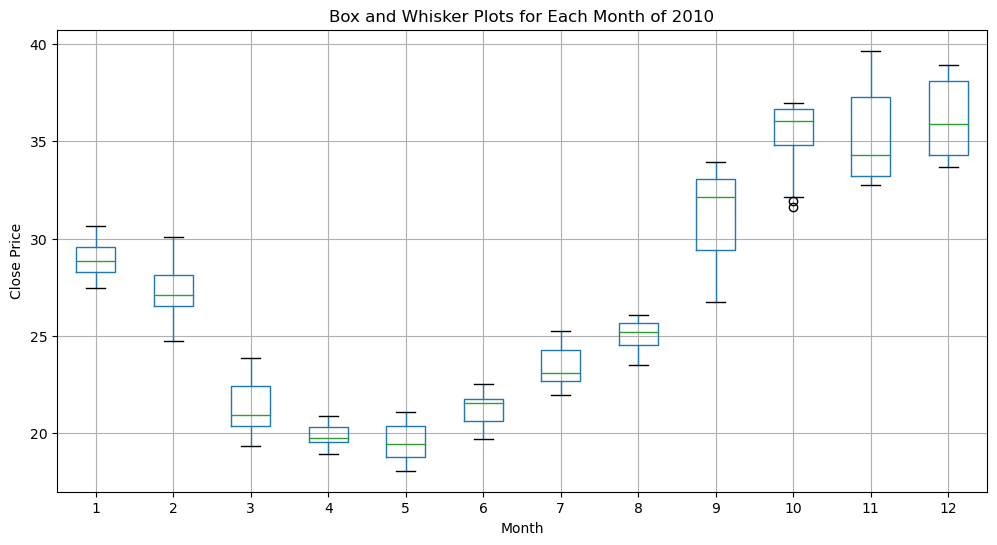

In [21]:
# # Use temp_data to extract values for 2010
# yr_2024 = data_['2010']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2010')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

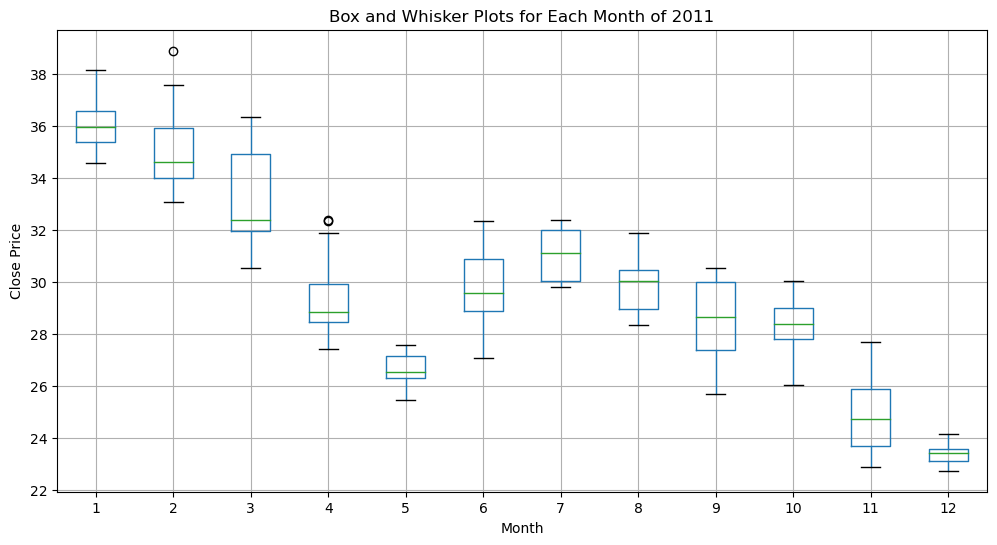

In [23]:
# # Use temp_data to extract values for 2011
# yr_2024 = data_['2011']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2011')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

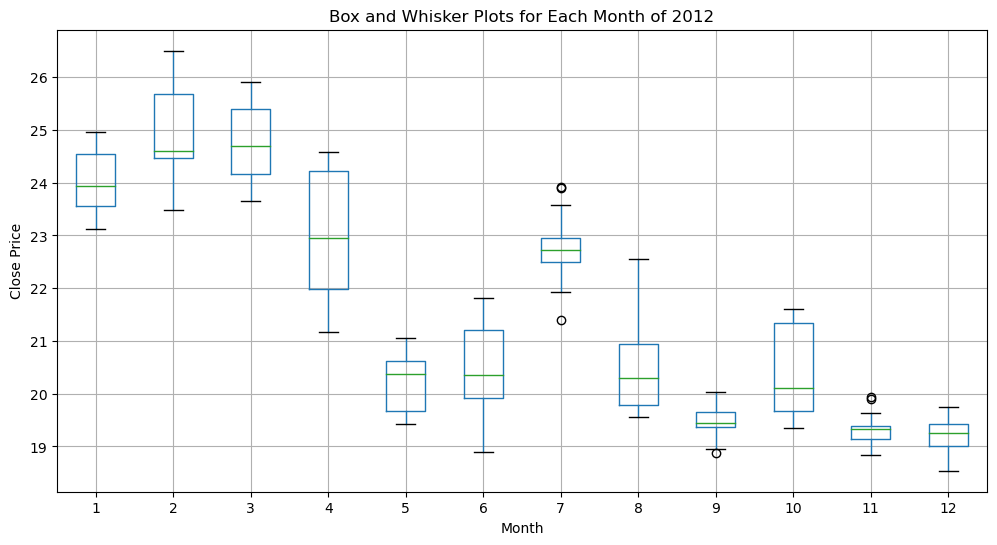

In [24]:
# # Use temp_data to extract values for 2012
# yr_2024 = data_['2012']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2012')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

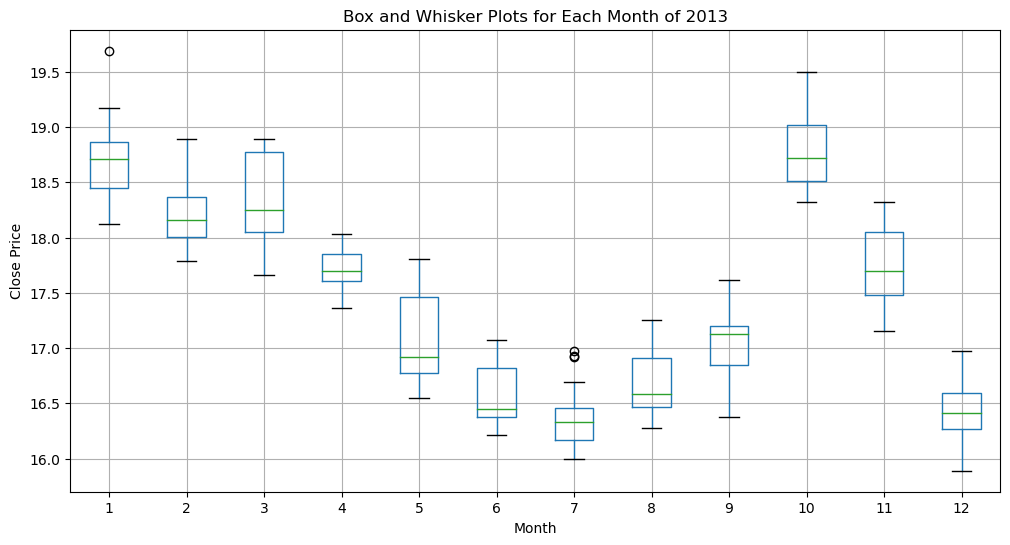

In [25]:
# # Use temp_data to extract values for 2013
# yr_2024 = data_['2013']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2013')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

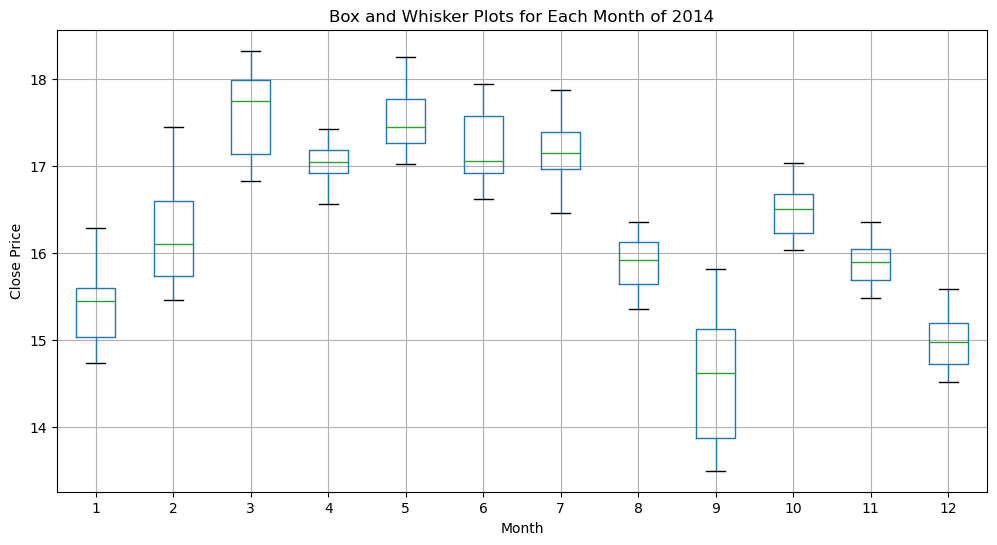

In [26]:
# # Use temp_data to extract values for 2014
# yr_2024 = data_['2014']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2014')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

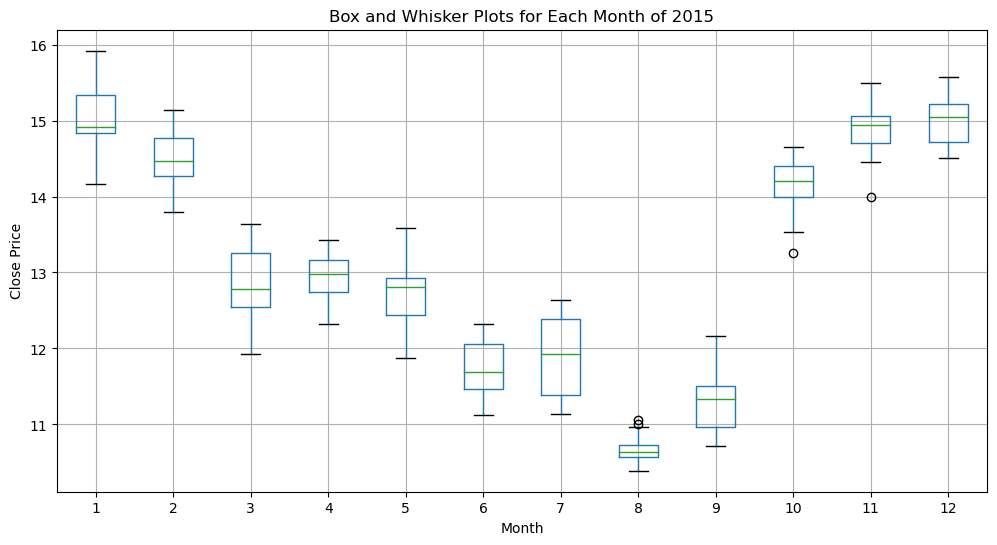

In [27]:
# # Use temp_data to extract values for 2015
# yr_2024 = data_['2015']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2015')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

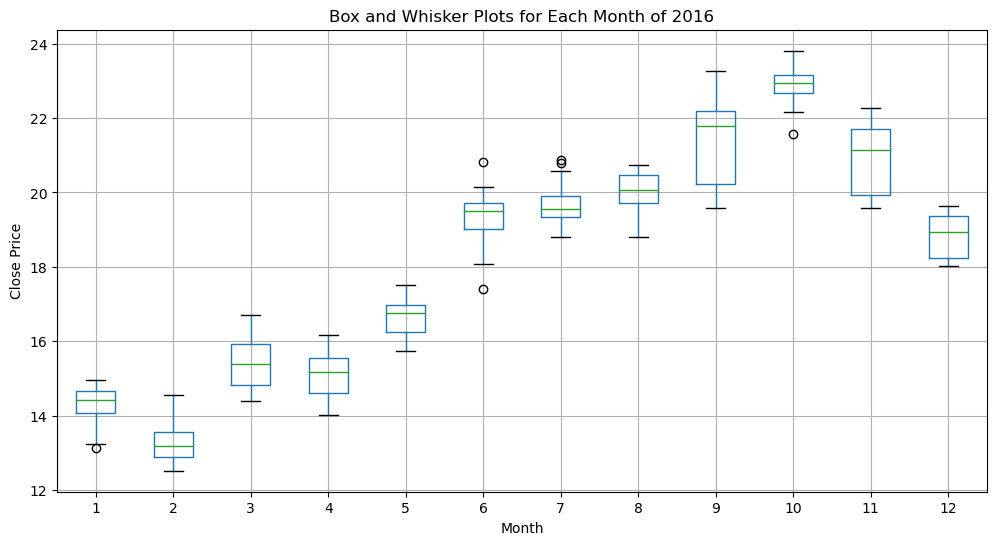

In [28]:
# # Use temp_data to extract values for 2016
# yr_2024 = data_['2016']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2016')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

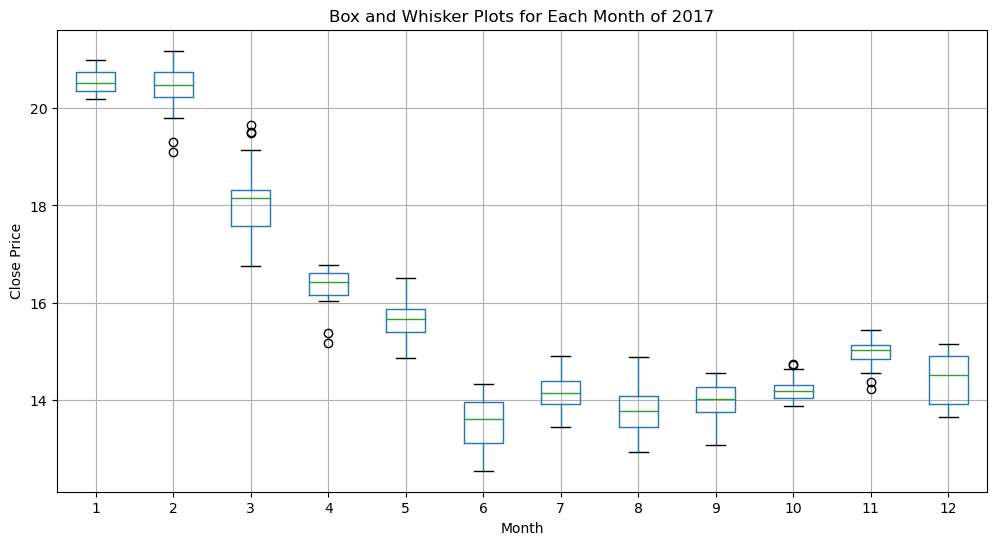

In [30]:
# # Use temp_data to extract values for 2017
# yr_2024 = data_['2017']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2017')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

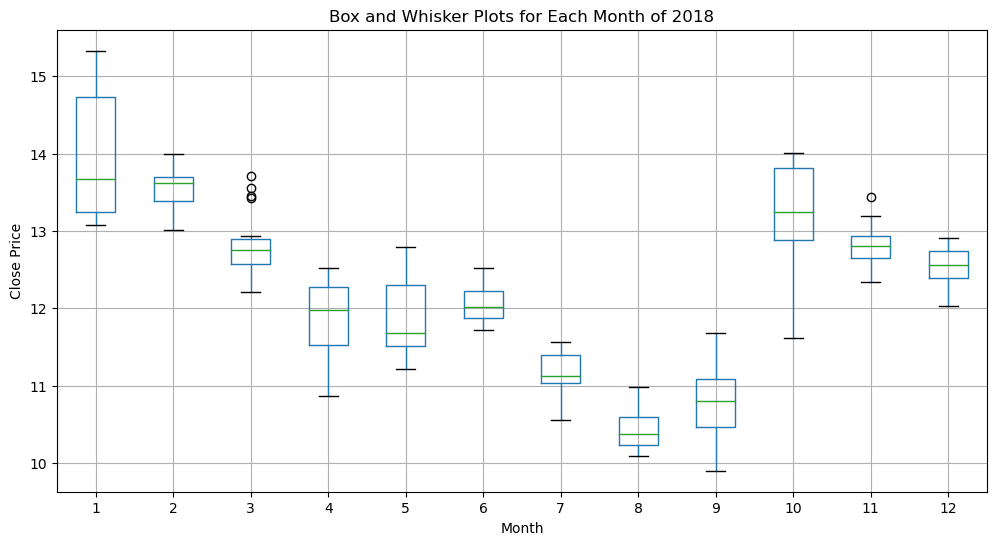

In [31]:
# # Use temp_data to extract values for 2018
# yr_2024 = data_['2018']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2018')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

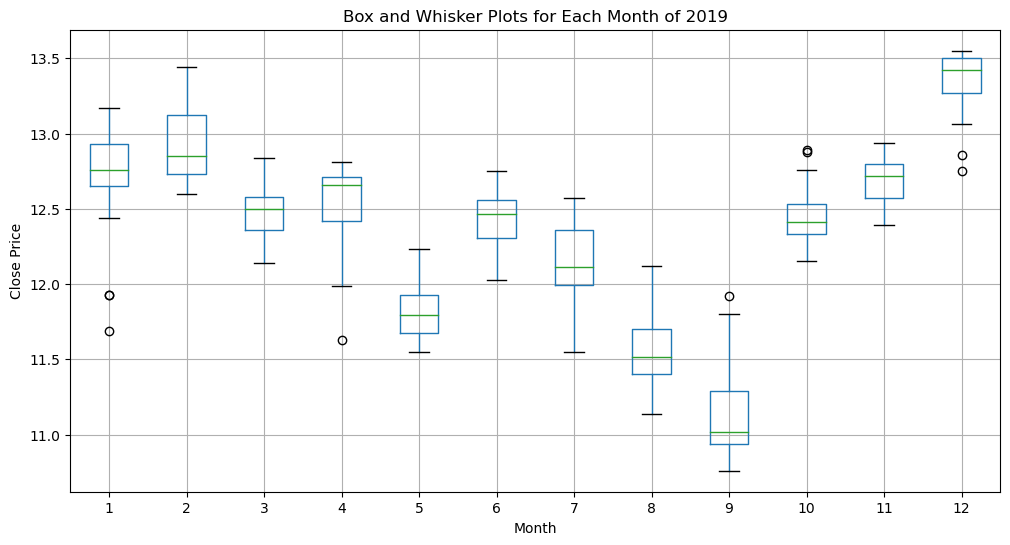

In [32]:
# # Use temp_data to extract values for 2019
# yr_2024 = data_['2019']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2019')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

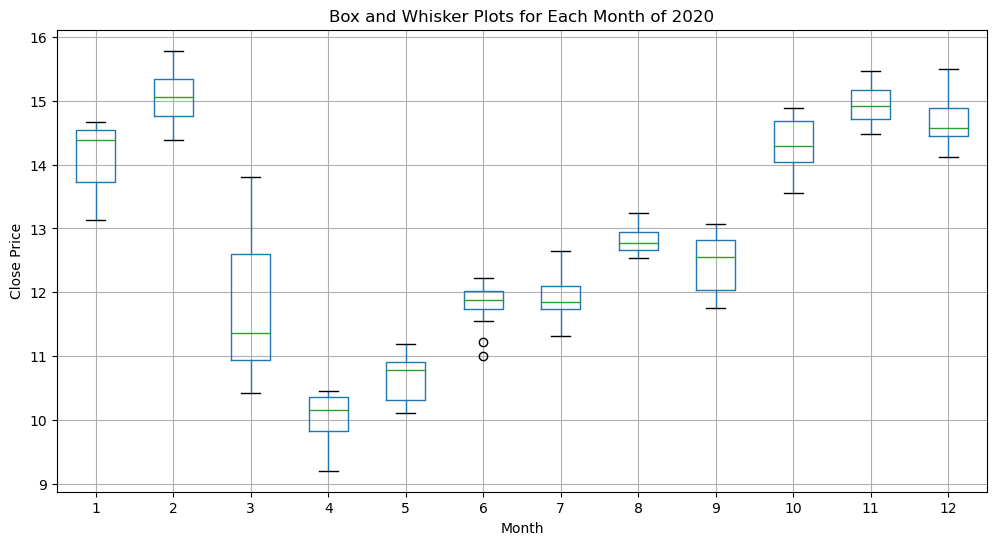

In [22]:
# # Use temp_data to extract values for 2020
# yr_2024 = data_['2020']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2020')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

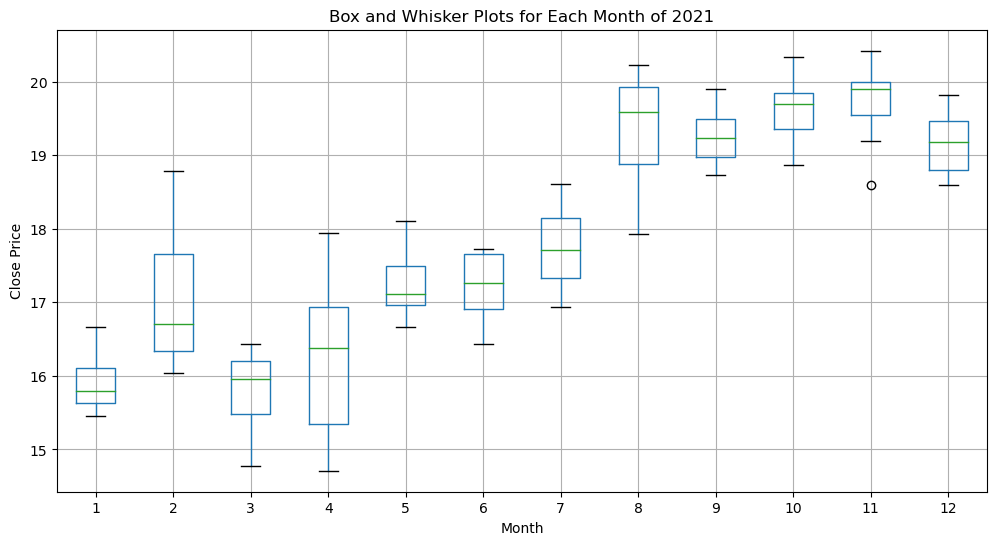

In [33]:
# # Use temp_data to extract values for 2021
# yr_2024 = data_['2021']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2021')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

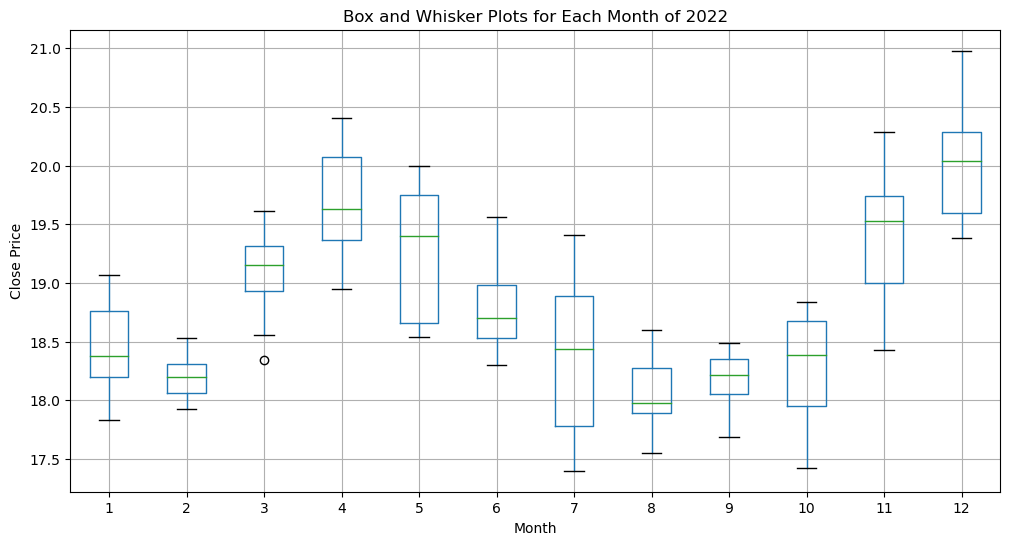

In [34]:
# # Use temp_data to extract values for 2022
# yr_2024 = data_['2022']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2022')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

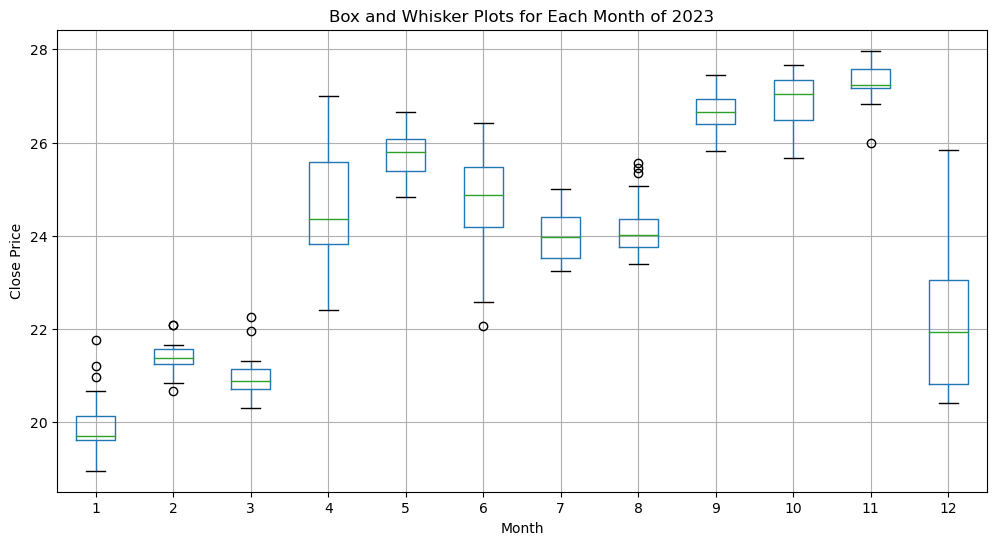

In [35]:
# # Use temp_data to extract values for 2023
# yr_2024 = data_['2023']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2023')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

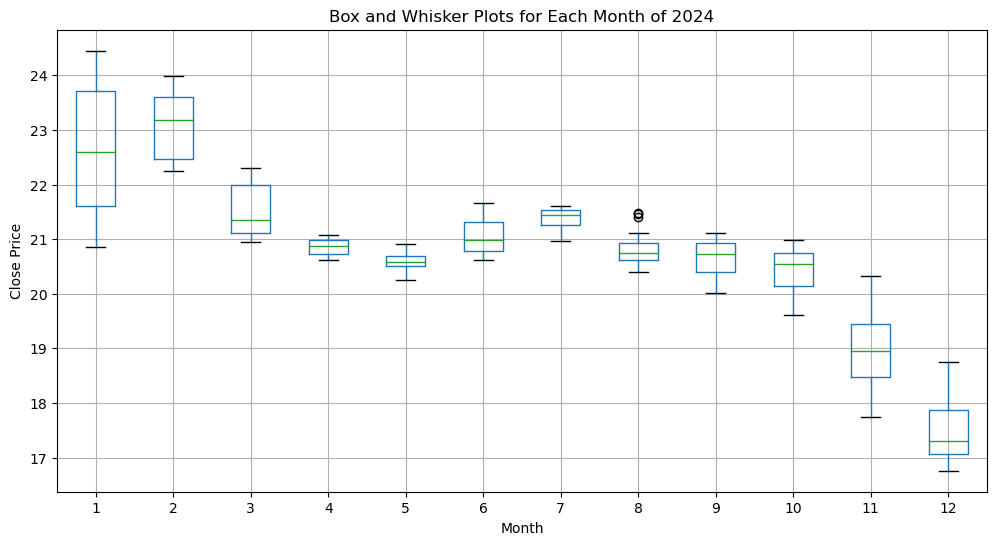

In [36]:
# # Use temp_data to extract values for 2024
# yr_2024 = data_['2024']
# yr_2024

# # Group observations by month using Grouper function
# # df_1990_grouped = df_1990.groupby(df_1990['Date'].dt.month) Use this if date is not an index
# groups_monthly = yr_2024.groupby(pd.Grouper(freq = 'M'))
# groups_monthly.head()


# # Add each month to DataFrame as a column
# months_2024 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)

# # Create a new DataFrame with each month as a column
# months_df = pd.DataFrame(months_2024)

# # # Set the column names for each month i.e. 1,2,3, .., 12
# months_df.columns = months_df.columns = range(1, 13)

# # Plot box and whisker plots for each month
# plt.figure(figsize=(12, 6))
# months_df.boxplot()
# plt.title('Box and Whisker Plots for Each Month of 2024')
# plt.xlabel('Month')
# plt.ylabel('Close Price')
# plt.show()

## Time Series Heat Maps

Let's create a heat map of the minimum daily temperatures data. 

- Rotate (transpose) the `temp_annual` DataFrame so that each row represents one year and each column one day  
- Use the `matshow()` function to draw a heat map for transposed yearly matrix 

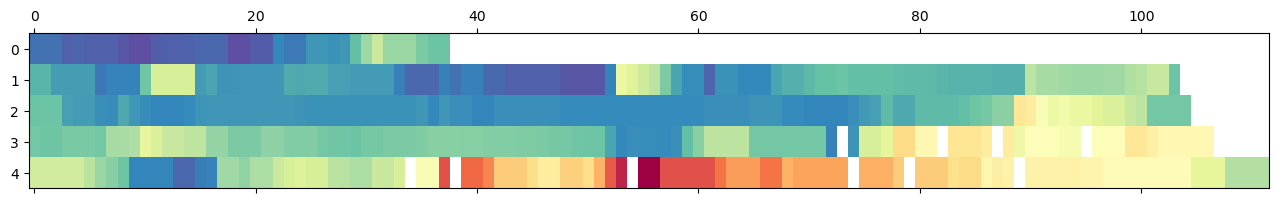

In [51]:
# Transpose the yearly group DataFrame
year_matrix = temp_annual.T

# Draw a heatmap with matshow()
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

We can now see that the plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

Following this intuition, let's draw another heatmap comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

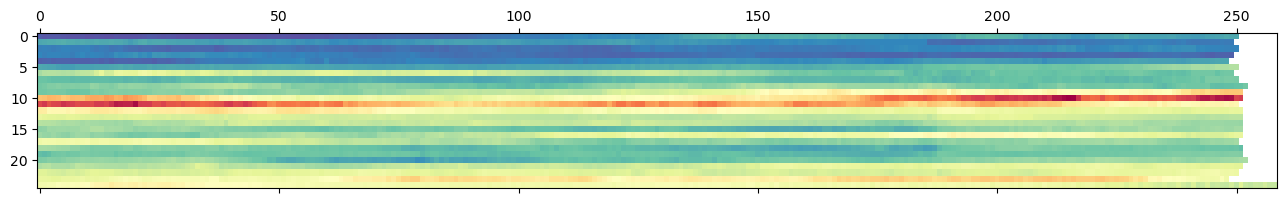

In [17]:
# # Transpose the yearly group DataFrame inclusive of predictions
# year_matrix_ = temp_annual_.T

# # Draw a heatmap with matshow()
# plt.matshow(year_matrix_, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

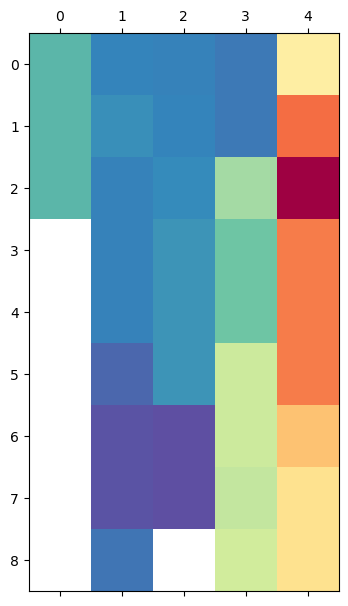

In [52]:
# Draw a heatmap comparing the months of the year in 1990 
# The months group DataFrame
year_matrix = months_df

# Draw a heatmap with matshow()
# plt.figure(figsize = (16, 26))
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

The plot shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

## Summary 

In this lab, you learned how to explore and better understand a time-series dataset using Pandas. You also learned how to explore the temporal relationships with line, scatter, box and whisper plots, histograms, density plots, and heat maps. 